In [6]:
import numpy as np
import h5py
import yaml
import os
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('dark_background')


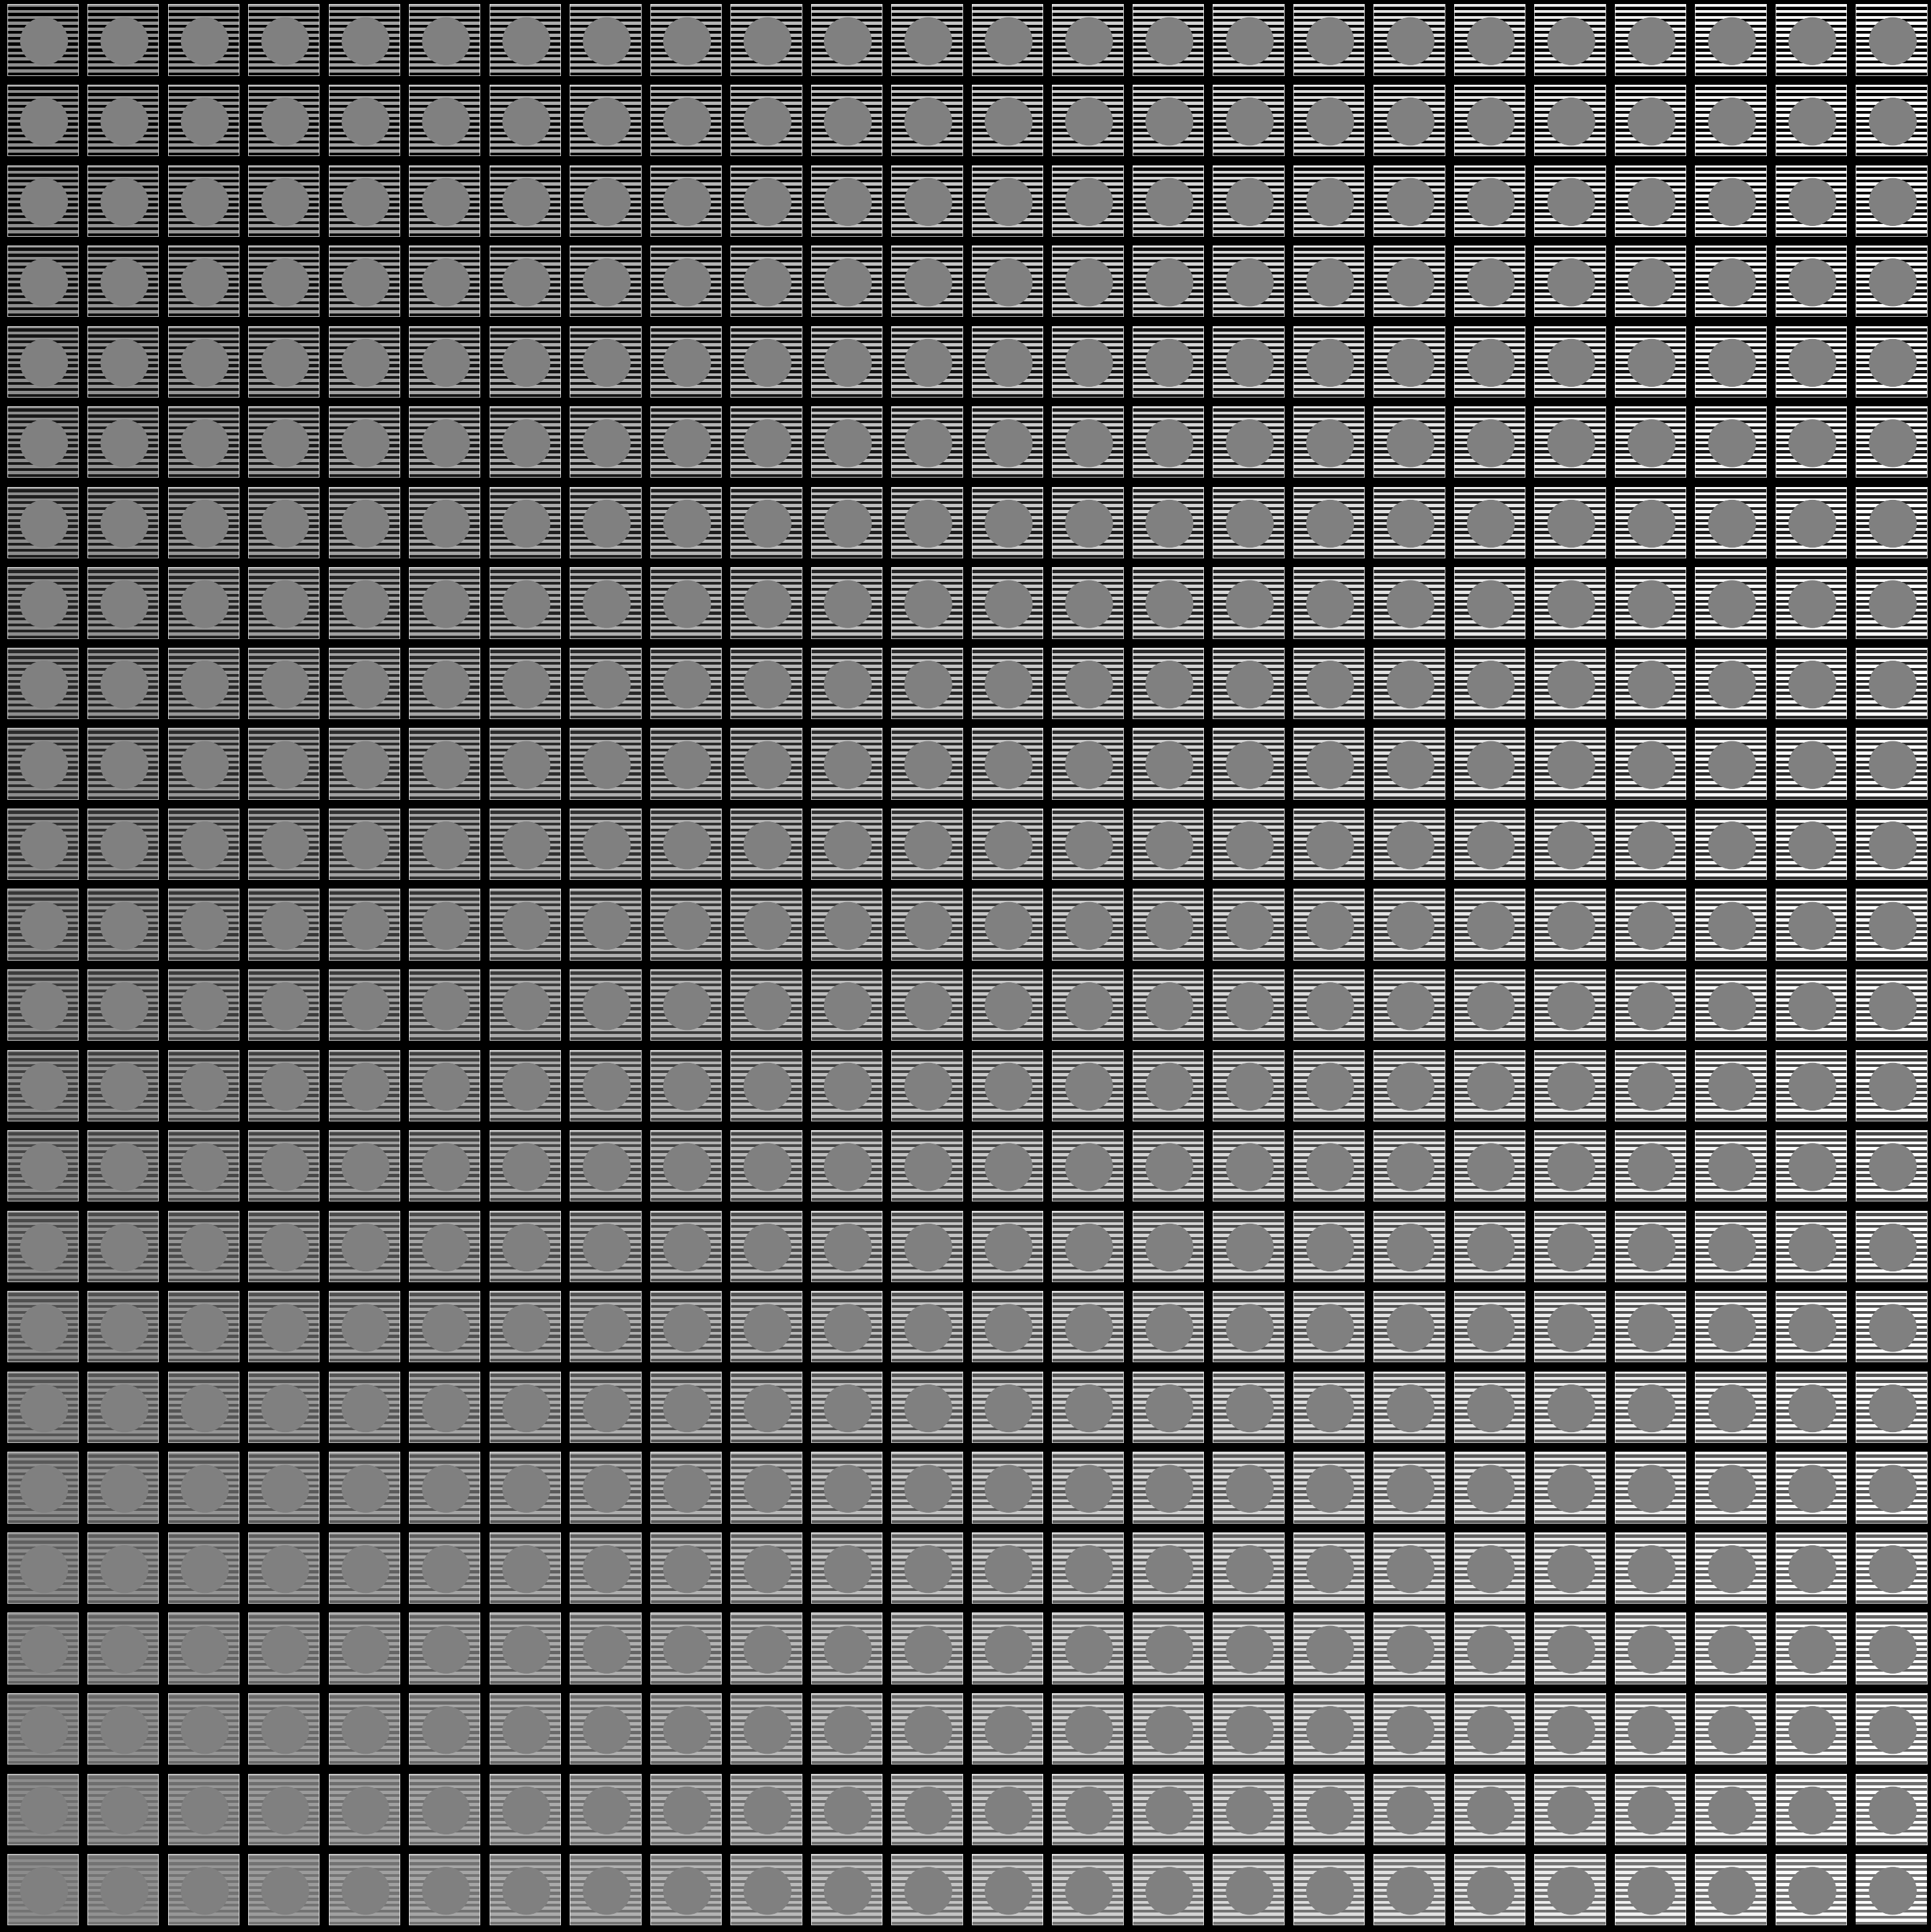

In [32]:
n_pix = 24
n_sbplots = 24

def plot_im(ax, n_pix, min, max, mid):
    field = np.zeros((n_pix,n_pix))
    field[::2, :] = max
    field[1::2, :] = min
    ax.imshow(field, cmap='gray', interpolation='none', clim=[0,1])
    mid_fig = plt.Circle((n_pix/2,n_pix/2), radius=n_pix/3, color=[mid,mid,mid])
    ax.add_patch(mid_fig)

mins, maxs = np.linspace(0, 0.45, n_sbplots), np.linspace(1, 0.55, n_sbplots)[::-1]


f, sbps = plt.subplots(n_sbplots, n_sbplots, figsize=(40,40))
for i in range(n_sbplots):
    for j in range(n_sbplots):
        ax = sbps[i,j]
        plot_im(ax, n_pix, mins[i], maxs[j], 0.5)
        ax.set_xticks([])
        ax.set_yticks([])
        # ax.set_xlabel(f'{mins[i]:.2f}')
        # ax.set_ylabel(f'{maxs[j]:.2f}')
        # ax.set_title(f'{mins[i]:.2f} - {maxs[j]:.2f}')
plt.axis('off')
plt.tight_layout()
plt.savefig('gamma.png')

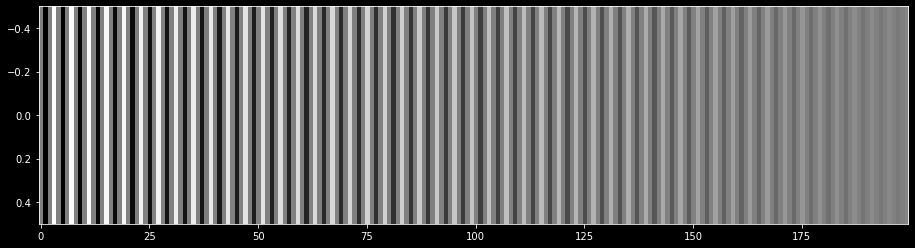

In [22]:
n_pix = 50

light = np.linspace(1, 0.525, n_pix)
dark = np.linspace(0, 0.475, n_pix)
all = np.zeros(n_pix*4)

all[0::4] = 0.5
all[2::4] = 0.5
all[1::4] = dark
all[3::4] = light

f = plt.figure(figsize=(20,4))
plt.imshow(all[:,np.newaxis].T, aspect=n_pix, cmap='gray', interpolation='none', clim=[0,1])

<AxesSubplot:>

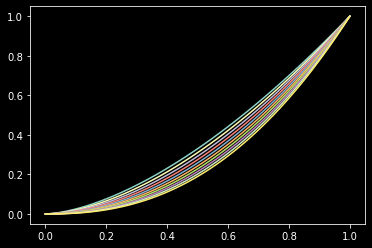

In [24]:
inputs = np.linspace(0,1,100,endpoint=True)
gammas = np.linspace(1.6,2.4,10,endpoint=True)

curves = np.zeros((inputs.shape[0], gammas.shape[0]))

for i, gamma in enumerate(gammas):
    curves[:,i] = inputs ** gamma

curve_df = pd.DataFrame(curves, index=inputs, columns=gammas).plot(legend=False)


<AxesSubplot:>

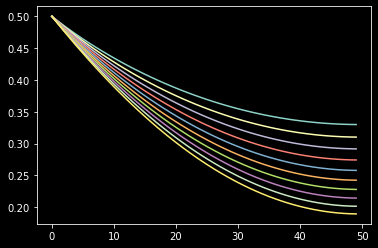

In [30]:
pd.DataFrame(np.array([(curves[:50,i]+curves[50:,i][::-1])/2 for i in range(gammas.shape[0])]).T, columns=gammas).plot(legend=False)